<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/ThreePhaseVoltages_PosAndNegSequences_Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Positive vs Negative Sequence</h1></b>

Dr. Bingsen Wang

2/23/2025
</center>

#Python Code

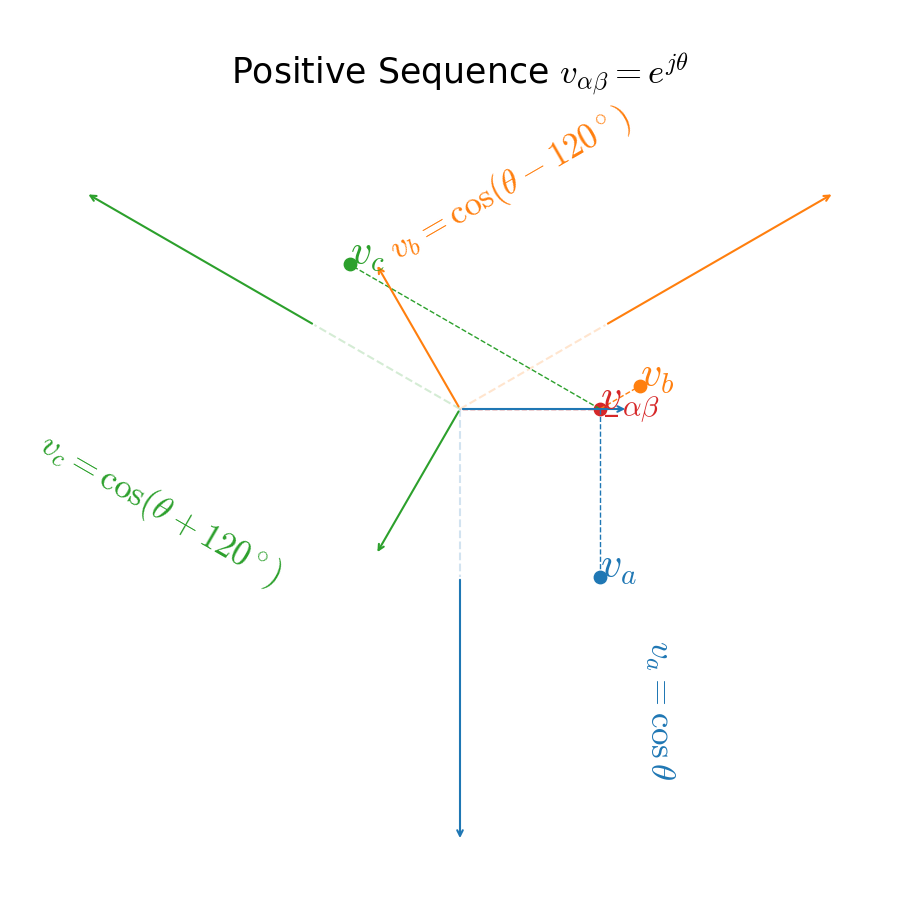

In [76]:
from matplotlib import pyplot,animation,cm,transforms
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def fv(x,r,kp,kn,tp,tn):
  f=[r*2/3*sum(np.cos(x-(-1)**i*k*2*np.pi/3+[tp,tn][i])*np.exp(2j/3*k*np.pi) for k in range(3)) for i in range(2)]
  return f[0]*kp+f[1]*kn

def c2ri(x):
  return np.array([x.real,x.imag])

Nf,r,a,kx = 250,2.8,np.exp(1j*2*np.pi/3),0.8
xy0=-1.2j*r*np.exp(1j*np.arange(0,2*np.pi,2*np.pi/3))
theta = np.linspace(0,2*np.pi,Nf)
fp,fn,fpn = fv(theta,r,1,0,0,0),fv(theta,r,0,1,0,0),fv(theta,r,.8,.2,0,np.pi/2)
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-9,9],ylim=[-10,8])
ax.axis('off')
for k in range(3):
  xy=c2ri(xy0[k])
  rt = transforms.Affine2D().rotate_deg_around(xy[0],xy[1],120*k-90)+ax.transData
  ax.plot([0,xy[0]],[0,xy[1]],'--',lw=1.5,c=clst[k],alpha=.2)
  ap={'arrowstyle':'->','lw':1.5,'color':clst[k]}
  ax.annotate('',c2ri(1.2*r*(a**k)),(0,0),arrowprops=ap)
  ax.annotate('',xy-c2ri(2.1j*np.pi*kx*a**k),xy,arrowprops=ap)
sc=[ax.scatter(0,0,marker='o',color=clst[k],s=80) for k in range(4)]
lines=[ax.plot([],[],ls=['-','--'][k//4],lw=[2.5,1][k//4], c=clst[k%4])[0] for k in range(8)]
lines[3].set_linewidth(3.5)
txts=[ax.text(0,0,['$v_a$','$v_b$','$v_c$',r'$v\underbar_{\alpha\beta}$'][k],
              size=30,color=clst[k]) for k in range(4)]
txts1=[ax.text([4,1,-6][k],[-6,4.5,-2][k],'test',size=18,color=clst[k],
               rotation=[-90,30,-30][k],ha='center',va='center') for k in range(3)]
title=ax.text(0,6.5,'',size=25,ha='center')
def animate(ii):
  i=ii%Nf
  if i==0:
    title.set_text([r'Positive Sequence $v_{\alpha\beta}=e^{j\theta}$',
                    r'Negative Sequence $v_{\alpha\beta}=e^{-j\theta}$',
                    r'Imbalanced $v_{\alpha\beta}=0.8e^{j\theta}+0.2e^{-j(\theta+90^\circ)}$'][ii//Nf])
    [txts1[k].set_text([[r'$v_a=\cos\theta$',
                         r'$v_a=\cos\theta$',
                         r'$v_a=0.8\cos\theta-0.2\sin\theta$'][ii//Nf],
                        [r'$v_b=\cos(\theta-120^\circ)$',
                         r'$v_b=\cos(\theta+120^\circ)$',
                         r'$v_b=0.8\cos(\theta-120^\circ)-$'+'\n'+r'$\hspace{1}0.2\sin(\theta+120^\circ)$'][ii//Nf],
                        [r'$v_c=\cos(\theta+120^\circ)$',
                         r'$v_c=\cos(\theta-120^\circ)$',
                         r'$v_c=0.8\cos(\theta+120^\circ)-$'+'\n'+r'$\hspace{1}0.2\sin(\theta-120^\circ)$'][ii//Nf]
                        ][k]) for k in range(3)]
    [txts1[k].set_fontsize([25,25,18][ii//Nf]) for k in range(3)]
  f=[fp,fn,fpn][ii//Nf]
  for k in range(3):
    xy=c2ri(xy0[k])
    rt = transforms.Affine2D().rotate_deg_around(xy[0],xy[1],120*k-90)+ax.transData
    sc[k].set_offsets([xy[0]+theta[i]*kx,xy[1]+(f[i]*a**(-k)).real])
    lines[k].set_data(xy[0]+theta[:i+1]*kx, xy[1]+(a**(-k)*f[:i+1]).real)
    sc[k].set_offset_transform(rt), lines[k].set_transform(rt)
    xyk=(lines[k].get_xdata()[-1]+1j*lines[k].get_ydata()[-1]-xy0[k])*(-1j*a**k)+xy0[k]
    lines[k+4].set_data(zip(c2ri(f[i]),c2ri(xyk)))
    txts[k].set_position(c2ri(xyk))
  lines[3].set_data(c2ri(f[:i+1])), lines[7].set_data([f[i].real,0],[f[i].imag,0])
  sc[3].set_offsets(c2ri(f[i])),  txts[3].set_position(c2ri(f[i]))
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*3, interval=50)
anim.save("ThreePhaseVoltages_imbalanced.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)